In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder


In [23]:
df = pd.read_csv('train.csv')

# Data preprocessing steps: drop columns, label encoding, and handling missing values
df = df.drop(["Name", "Ticket", "Cabin"], axis=1)
label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

# Handling missing values
imputer = SimpleImputer(strategy='mean')
df["Age"] = imputer.fit_transform(df[["Age"]])
df["Embarked"] = imputer.fit_transform(df[["Embarked"]])

     Pclass  Sex   Age  SibSp  Parch      Fare  Embarked
0         3    1  34.5      0      0    7.8292         1
1         3    0  47.0      1      0    7.0000         2
2         2    1  62.0      0      0    9.6875         1
3         3    1  27.0      0      0    8.6625         2
4         3    0  22.0      1      1   12.2875         2
..      ...  ...   ...    ...    ...       ...       ...
413       3    1   NaN      0      0    8.0500         2
414       1    0  39.0      0      0  108.9000         0
415       3    1  38.5      0      0    7.2500         2
416       3    1   NaN      0      0    8.0500         2
417       3    1   NaN      1      1   22.3583         0

[418 rows x 7 columns]


C:\Users\prodi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


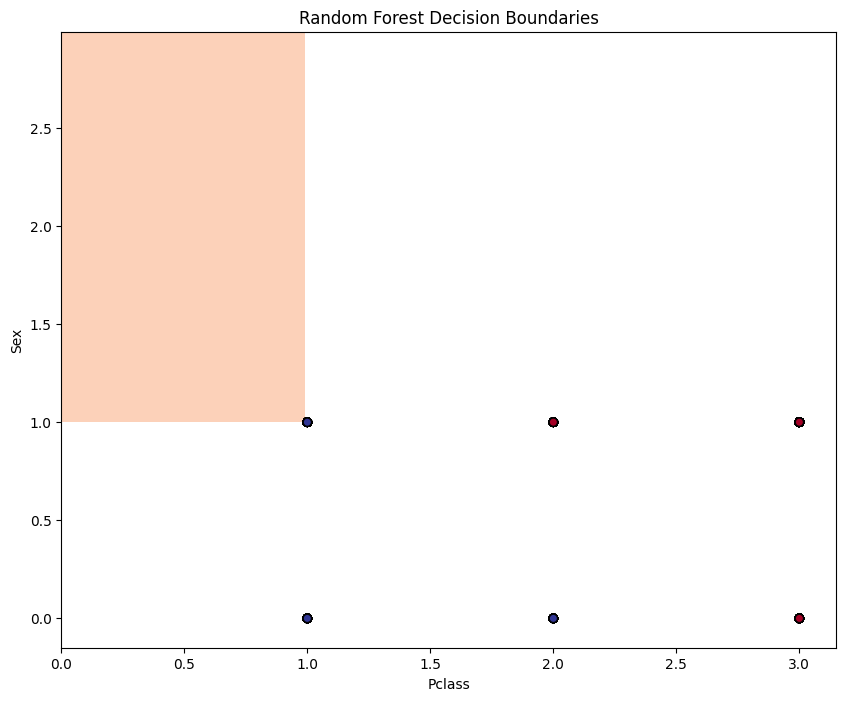

In [26]:
# Task 2: Visualize Decision Boundaries
y_test=pd.read_csv("gender_submission.csv")
y_test=y_test["Survived"]
X_test=df_test

X_train=df.drop(["Survived"],axis=1)
y_train=df["Survived"]

X_train=X_train[["Pclass","Sex"]]
print(X_test)

# Create a meshgrid for visualization
min1, max1 = 0, 1
min2, max2 = 1, 3
x1grid = np.arange(min1, max1, 0.01)
x2grid = np.arange(min2, max2, 0.01)
xx, yy = np.meshgrid(x1grid, x2grid)

# Train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict and visualize decision boundaries
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)
plt.scatter(X["Pclass"], X["Sex"], c=y, cmap=plt.cm.RdYlBu, edgecolor='k')
plt.xlabel("Pclass")
plt.ylabel("Sex")
plt.title("Random Forest Decision Boundaries")
plt.show()

In [27]:
# Task 3: Hyperparameter Tuning
hyperparameters = {
    "max_depth": range(1, 21),
    "min_samples_split": range(2, 21),
    "min_samples_leaf": range(1, 11),
    "min_weight_fraction_leaf": np.linspace(0.0, 0.5, 11),
    "max_features": np.arange(0.1, 1.1, 0.1),
    "max_leaf_nodes": range(2, 21),
    "min_impurity_decrease": np.arange(0.0, 0.6, 0.1)
}

best_hyperparameters = {}
best_accuracy = 0.0

for param, values in hyperparameters.items():
    accuracy_values = []
    for value in values:
        clf = RandomForestClassifier(random_state=42, n_jobs=-1)
        setattr(clf, param, value)
        scores = cross_val_score(clf, X, y, cv=5)
        accuracy = np.mean(scores)
        accuracy_values.append(accuracy)

    best_index = np.argmax(accuracy_values)
    best_value = values[best_index]
    best_hyperparameters[param] = best_value

    if accuracy_values[best_index] > best_accuracy:
        best_accuracy = accuracy_values[best_index]
        
# Print the best hyperparameters and their accuracies
for param, value in best_hyperparameters.items():
    print(f"Best {param}: {value}")
print(f"Best Accuracy: {best_accuracy}")

Best max_depth: 2
Best min_samples_split: 2
Best min_samples_leaf: 1
Best min_weight_fraction_leaf: 0.35000000000000003
Best max_features: 0.1
Best max_leaf_nodes: 3
Best min_impurity_decrease: 0.1
Best Accuracy: 0.7867993220764548


In [28]:
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold

best_clf = RandomForestClassifier(random_state=12)
for name, value in best_hyperparameters.items():
    setattr(best_clf, name, value)

# Perform stratified cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(best_clf, X_train, y_train, cv=cv)

# Calculate the average accuracy from cross-validation
cv_accuracy = np.mean(cv_scores)

# Train the model on the full training set
best_clf.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = best_clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

# Print the accuracies
print("Cross-Validation Accuracy:", cv_accuracy)
print("Test Accuracy:", test_accuracy)

# Plot the decision tree
plot_tree(best_clf, filled=True)
plt.title("Decision Tree with Best Hyperparameters")
plt.show()


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Age
- Embarked
- Fare
- Parch
- SibSp
